# Strömgren sphere

**Ionization profile**
In 1937, Bengt Strömgren developed a simple model to describe the radial profile of the ionization fraction in HII regions. The central star emits $S_*$ ionizing photons per second ($h\nu > 13.6$ eV), and it is modeled as a perfect black body with surface temperature $T_*$ and radius $R_*$. The total ionizing photon emission rate is given by:

$$
S_* = 4\pi R_*^2 \int_0^{91.2} \frac{B(T_*, \lambda)}{hc/\lambda} \, d\lambda,
$$

where $B(T_*, \lambda)$ is the Planck function, and the integral is taken over wavelengths shorter than the Lyman limit (91.2 nm).

At a distance $r$ from the star, the photoionization equilibrium condition (neglecting collisional ionizations) is reached when the rate of ionizations equals the rate of recombinations. This condition is expressed as:

$$
\Gamma_\text{ion} n_H (1 - x) = x^2 n_H^2 \alpha_B,
$$

where $n_H$ is the uniform hydrogen number density, $x = n_{\text{HII}} / n_H$ is the ionized fraction, $\alpha_B = 2.59 \times 10^{-13} \, \text{cm}^3 \, \text{s}^{-1}$ at $T = 10^4$ K is the case B recombination coefficient for standard HII regions temperature (Osterbrock, 1989).

The photoionization rate is given by:

$$
\Gamma_\text{ion}(r) = \frac{S_*}{4 \pi r^2} e^{-\tau(r)} \cdot \sigma_H,
$$

where we assume spherical symmetry, $\sigma_H = 6.3 \times 10^{-18} \, \text{cm}^2$ is the hydrogen ionization cross section, and $\tau(r)$ is the optical depth, accounting for photon loss due to absorption within radius $r$.

Strömgren's original treatment did not include dust, but dust can be easily incorporated. The total optical depth $\tau(r)$ becomes:

$$
\tau(r) = \tau_H + \tau_\text{dust} = \int_0^r x(r) n_H \sigma_H \, dr' + \int_0^r n_H \tilde{\sigma}_{d,_H} \, dr',
$$

The effective dust cross section per hydrogen atom, $\sigma_{d,H}$ is a weighted average of the specific cross section per hydrogen atom, $\sigma_{\lambda,H}$, integrated over all wavelengths shorter than the Lyman break:

$$
\tilde{\sigma}_{d,H} = \frac{\int_0^{91.2} B(\lambda) \, \sigma_{d,H}(\lambda) \, d\lambda}{\int_0^{91.2} B(\lambda) \, d\lambda}.
$$

Finally, the stratification of the ionized hydrogen fraction is obtained by solving the equation numerically (and recursively):

$$
\frac{S_*}{4 \pi r^2} e^{-\left[ \int_0^r x(r) n_H \sigma_H \, dr' + \int_0^r n_H \tilde{\sigma}_{d,H} \, dr' \right]} n_H (1 - x(r)) \sigma_H = x(r)^2 n_H^2 \alpha_B.
$$

**Strömgren radius**

The transition from $x = 1$ (fully ionized) to $x = 0$ (fully neutral) is very steep. To approximate the ionization profile, we use a step function and define the **Strömgren radius** as the radius where hydrogen transitions from fully ionized to fully neutral.

This transition occurs when the rate of photoionizations equals the rate of recombinations, which can be expressed as:

$$S_* = \int_0^{R_S} \alpha_B n_{_{HII}}^2 \, 4 \pi r^2 \, dr$$

Assuming a uniform hydrogen density $n_{_H} = n_{_{HII}} $, this simplifies to:

$$R_S = \left(\frac{3S_*}{4\pi \alpha_B n_{_H}^2}\right)^{1/3}$$

It is straightforward to correct for dust: dust reduces the number of ionizing photons by absorbing a fraction of the radiation. This introduces an additional term to the ionization balance equation: 

$$S_*=\int_0^{R_S}\beta_2 n_p^2 4\pi r^2 dr + \int_0^{R_S} \Gamma_\text{ph}(r) n_\text{dust} 4\pi r^2dr$$

where $\Gamma_\text{dust}(r)$ is the rate of absorption by dust, $[\Gamma_\text{dust}] = \text{s}^{-1}$. It can be expressed as a function of the flux of ionizing photons and of the dust effective cross section: 

$$\Gamma_\text{ph}(r) = \frac{S_*}{4\pi r^2}e^{-\tilde{\sigma}_{d,_H}\,n_{_H}\,r}$$

Integrating:

$$S_* = \beta_2n_H^2 \tfrac{4\pi}{3}\,R_S^3 + S_*\left(1-e^{-\tilde{\sigma}_{d,_H}n_{_H}R_S}  \right)$$ 

The ultimate effect of dust is to reduce the number of ionizing photons of a factor $e^{-\tau_d} = e^{-\tilde{k}E(B-V)/1.086}$. In terms of reddening $E(B-V)$ and of the effective $k$ (averaged over all wavelenghts shorter than the Lyman break):

$$S_*e^{-\tilde{k}E(B-V)/1.086} = \alpha_B\,n_{_H}^2 \tfrac{4\pi}{3}R_S^3$$ 


References:


https://en.wikipedia.org/wiki/Str%C3%B6mgren_sphere

https://www.astroscu.unam.mx/rmaa/RMxAA..51-2/PDF/RMxAA..51-2_aragaV.pdf

https://articles.adsabs.harvard.edu/pdf/1972ApJ...177L..69P

https://iopscience.iop.org/article/10.1086/317718/pdf

https://arxiv.org/pdf/1705.00269



In [3]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from astropy.io import fits

filter = ['Ha', 'Hb', 'g', 'r', 'i']
file_paths = {f: f'data/cleaned_calibrated/{f}_calibrated.fit' for f in filter}
filter_cmap = {'Ha': 'hot','Hb': 'magma','g': 'bone','r': 'hot','i': 'copper'}
image = {}
sigma = {}

for f in filter:
    with fits.open(file_paths[f]) as hdul:
        image[f] = hdul[0].data
        header = hdul[0].header
        sigma[f] = hdul[0].header['sigma']

with fits.open('data/cleaned_calibrated/Ha_calibrated.fit'):
    params_ra = [header.get(f'RA_A{i}') for i in range(3)]
    params_dec = [header.get(f'DEC_B{i}') for i in range(3)]

def xy_to_radec(x, y):
    """
    Transform grid of (x, y) to (RA, Dec) coordinates.
    """
    ra = params_ra[0] + params_ra[1] * x + params_ra[2] * y
    dec = params_dec[0] + params_dec[1] * x + params_dec[2] * y
    return ra, dec

def radec_to_xy(ra, dec):
    A = np.array([[params_ra[1], params_ra[2]],
                  [params_dec[1], params_dec[2]]])
    b = np.array([ra - params_ra[0], dec - params_dec[0]])
    # Solve the linear system A * [x, y] = b
    x, y = np.linalg.solve(A, b)
    return x, y

stars_astrometry = []

with fits.open("data/astrometry.fit") as hdul:
    if len(hdul) > 1:
        table_hdu = hdul[1]  

        if table_hdu.data.ndim == 1:
            table = np.stack(table_hdu.data)

        for row in table:
            stars_astrometry.append({'ra': row[0], 'dec': row[1], 'x': row[2], 'y': row[3]})


# Extract the surface brightness radial profile to determine the cloud radius

Due to the clear non-uniformity oh the nebula the radial profile is extracted with circular apertures on many rays. Circular annuli are defined as well.


In [12]:
### === MASK STARS === ###

from astropy.modeling import models, fitting
from scipy.ndimage import median_filter

# This subtraction highlights stars while suppressing extended nebular structures, making it easier to detect and mask stars:
filtered_image = image['Ha'] - median_filter(image['Ha'], size=10)

masked_Ha = np.copy(image['Ha'])  
masked_Hb = np.copy(image['Hb']) 

for star in stars_astrometry:
    if 1000 < star['x'] < 3000 and 800 < star['y'] < 2400:
        l = 25
        rectangle = filtered_image[int(star['y'] - l):int(star['y'] + l), 
                                        int(star['x'] - l):int(star['x'] + l)]
        y, x = np.mgrid[:rectangle.shape[0], :rectangle.shape[1]]
        g_init = models.Gaussian2D(amplitude=rectangle.max(), x_mean=l, y_mean=l, x_stddev=5, y_stddev=5)
        fit = fitting.LevMarLSQFitter()
        g_fit = fit(g_init, x, y, rectangle)
            
        refined_x = star['x'] - l + g_fit.x_mean.value
        refined_y = star['y'] - l + g_fit.y_mean.value

        sigma_x, sigma_y = g_fit.x_stddev.value, g_fit.y_stddev.value
        fwhm_x = 2.355 * sigma_x
        fwhm_y = 2.355 * sigma_y
        fwhm = (fwhm_x + fwhm_y) / 2
        y, x = np.ogrid[:masked_Ha.shape[0], :masked_Hb.shape[1]] # circular aperture mask around the star

        # For a symmetric Gaussian, the flux has reduced by approximately 98.89% at 1.5×FWHM
        if fwhm < l/2:
            mask_radius = 2 * fwhm 
            mask = (x - refined_x)**2 + (y - refined_y)**2 <= mask_radius**2    
            masked_Ha[mask] = 0
            masked_Hb[mask] = 0


In [13]:
### === CIRCULAR ANNULI === ### 

# Central star is BD+46 3474 ( 	21 53 28.849152 	+47 15 59.78412   or    328.370205 	47.266607   J2000 ) 
# https://simbad.u-strasbg.fr/simbad/sim-coo?&Coord=328.375681513405d47.263674788998d&CooFrame=FK5&Radius=2&Radius.unit=arcmin
center_x, center_y = radec_to_xy(328.370134,47.266320) 

# Define the inner and outer radii for the circular annuli such that each annulus contains the same number of pixels (50000)
num_annuli = 40
N = 50000
R_int_pixel = [0.1]
R_ext_pixel = []

for i in range(num_annuli):
    r_ext = np.sqrt(N/np.pi + R_int_pixel[-1]**2)  # Use the previous outer radius to define the next outer radius
    R_ext_pixel.append(r_ext)
    R_int_pixel.append(r_ext)

# Generate the list of annuli radii as tuples of inner and outer radii (PIXEL SPACE)
annuli_radii = [(R_int_pixel[i], R_ext_pixel[i]) for i in range(num_annuli)]  

# Average surface brightness in each annulus
from photutils.aperture import CircularAnnulus, aperture_photometry

average_surface_brightness_Ha_annulus = []
average_surface_brightness_Hb_annulus = []

for inner_r, outer_r in annuli_radii:

    annulus = CircularAnnulus((center_x, center_y), r_in=inner_r, r_out=outer_r)

    # Ha
    phot = aperture_photometry(masked_Ha, annulus, error = np.full(masked_Ha.shape, sigma['Ha']))
    I_Ha = phot['aperture_sum'][0]
    Ha_err = phot['aperture_sum_err'][0]              
    average_surface_brightness_Ha_annulus.append([I_Ha / N, Ha_err / N])

    # Hb
    phot = aperture_photometry(masked_Hb, annulus, error = np.full(masked_Hb.shape, sigma['Hb']))
    I_Hb = phot['aperture_sum'][0]
    Hb_err = phot['aperture_sum_err'][0]
    average_surface_brightness_Hb_annulus.append([I_Hb / N, Hb_err / N])


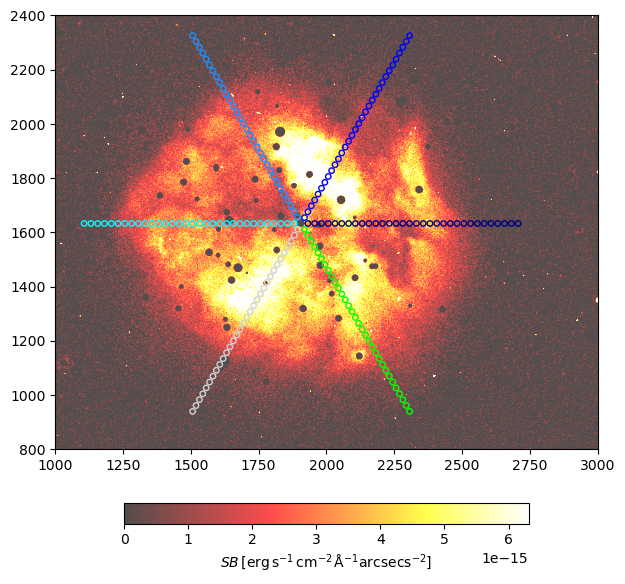

In [14]:
### === RADIAL DIRECTIONS === ### 

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(masked_Ha, cmap=filter_cmap['Ha'],clim=[0, np.quantile(image['Ha'], 0.99)],origin='lower',alpha=0.7)
fig.colorbar(im,ax=ax,location='bottom', fraction=0.0375, pad=0.1, label="$SB \, [\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, \u00c5^{-1} arcsecs^{-2}}]$")

center_x, center_y = radec_to_xy(328.370134,47.266320) 
ax.set_xlim(1000,3000)
ax.set_ylim(800,2400)

theta = [np.pi/3 * i for i in range(6)]
lines_Ha = []
lines_Hb = []
colors = ['navy', 'blue', 'dodgerblue', 'cyan', 'lightgrey', 'lime'] #, 'mediumseagreen', 'darkgreen']
radius = 10 
step = 25
r_array = np.array([step*i for i in range(1,33)])

from photutils.aperture import CircularAperture,aperture_photometry
from matplotlib.patches import Circle

for j,t in enumerate(theta):
    
    average_surface_brightness_Ha = []    
    average_surface_brightness_Hb = []


    v = np.array([np.cos(t),np.sin(t)])
    for i in range(1,33):

        c_x,c_y = center_x + v[0]*step*i, center_y + v[1]*step*i
        circle = CircularAperture((c_x,c_y), r = radius)
        area = np.pi*radius**2
        
        # Ha
        phot = aperture_photometry(masked_Ha, circle, error = np.full(masked_Ha.shape, sigma['Ha']))
        I_Ha = phot['aperture_sum'][0]
        Ha_err = phot['aperture_sum_err'][0]               # = sqrt(N) * sigma
        average_surface_brightness_Ha.append([I_Ha / area, Ha_err / area])
    
        # Hb
        phot = aperture_photometry(masked_Hb, circle, error = np.full(masked_Hb.shape, sigma['Hb']))
        I_Hb = phot['aperture_sum'][0]
        Hb_err = phot['aperture_sum_err'][0]
        average_surface_brightness_Hb.append([I_Hb / area, Hb_err / area])

        circle = Circle((c_x,c_y), radius=radius, fill=False, linewidth=1, linestyle='-',color=colors[j])
        ax.add_patch(circle)

    lines_Ha.append(average_surface_brightness_Ha)
    lines_Hb.append(average_surface_brightness_Hb)



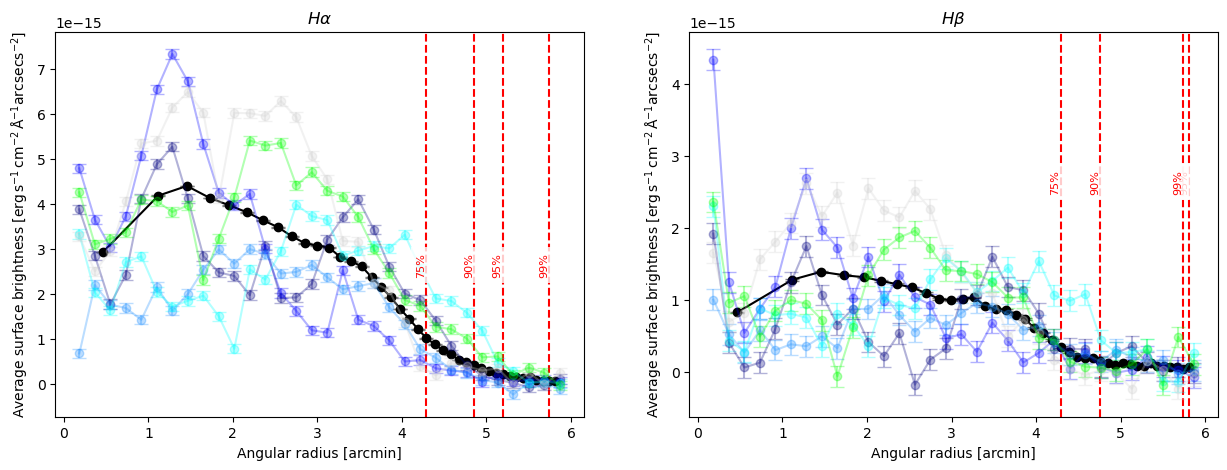

In [15]:
### === PLOT PROFILES === ###

angular_size_pixel_TOBI_arcmin = 0.44 / 60 # arcmin per pixel
theta_r = np.array([(inner_r + outer_r) / 2 for inner_r, outer_r in annuli_radii]) * angular_size_pixel_TOBI_arcmin

fig, ax = plt.subplots(1,2,figsize=(15,5))


ax[0].set(title = "$H\\alpha$", xlabel = "Angular radius [arcmin]", ylabel = "Average surface brightness $[\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, \u00c5^{-1} arcsecs^{-2}}]$")

I_Ha = [ph[0] for ph in average_surface_brightness_Ha_annulus]
err_Ha = [ph[1] for ph in average_surface_brightness_Ha_annulus]

ax[0].errorbar(theta_r, I_Ha, yerr=err_Ha, fmt='o', color='black', ecolor='grey', capsize=5, linestyle='-')

x = I_Ha/(max(I_Ha))
R_75 = theta_r[np.argmin(np.abs(x - (1-0.75)))]
R_90 = theta_r[np.argmin(np.abs(x - (1-0.90)))]
R_95 = theta_r[np.argmin(np.abs(x - (1-0.95)))]
R_99 = theta_r[np.argmin(np.abs(x - (1-0.99)))]

for r, label in zip([R_75, R_90, R_95, R_99], ['75', '90', '95', '99']):
    ax[0].axvline(r, color='red', linestyle='--', linewidth=1.5)
    ax[0].text(r, max(I_Ha) * 0.6, f"{label}%", rotation=90, 
               color='red', fontsize=8, va='center', ha='right', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))


ax[1].set(title = "$H\\beta$", xlabel = "Angular radius [arcmin]", ylabel = "Average surface brightness $[\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, \u00c5^{-1} arcsecs^{-2}}]$")

I_Hb = [ph[0] for ph in average_surface_brightness_Hb_annulus]
err_Hb = [ph[1] for ph in average_surface_brightness_Hb_annulus]

ax[1].errorbar(theta_r, I_Hb, yerr=err_Hb, fmt='o', color='black', ecolor='grey', capsize=5, linestyle='-')

x = I_Hb/(max(I_Hb))
R_75_ = theta_r[np.argmin(np.abs(x - (1-0.75)))]
R_90_ = theta_r[np.argmin(np.abs(x - (1-0.90)))]
R_95_ = theta_r[np.argmin(np.abs(x - (1-0.95)))]
R_99_ = theta_r[np.argmin(np.abs(x - (1-0.99)))]

for r, label in zip([R_75_, R_90_, R_95_, R_99_], ['75', '90', '95', '99']):
    ax[1].axvline(r, color='red', linestyle='--', linewidth=1.5)
    ax[1].text(r, max(I_Ha) * 0.6, f"{label}%", rotation=90, 
               color='red', fontsize=8, va='center', ha='right', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

##

theta_r_ = r_array * angular_size_pixel_TOBI_arcmin 

for i in range(len(lines_Ha)):
    
    ax[0].errorbar(theta_r_, [ph[0] for ph in lines_Ha[i]], yerr=[ph[1] for ph in lines_Ha[i]], fmt='o', color=colors[i], 
             ecolor=colors[i], capsize=5,linestyle='-',alpha=0.3)
    ax[1].errorbar(theta_r_, [ph[0] for ph in lines_Hb[i]], yerr=[ph[1] for ph in lines_Hb[i]], fmt='o', color=colors[i], 
             ecolor=colors[i], capsize=5,linestyle='-',alpha=0.3)


plt.show()


# Compute Strömgren radius

In [4]:
### === Extimate star ionizing photon rate === ###

T_star = 30500                  # star surface temperature [K] 
R_sun = 6.96e10                 # solar radius in cm
R_star = 5.2 * R_sun            # star radius 

h = 6.62607015e-27              # Planck's constant (erg·s)
c = 3.0e10                      # Speed of light (cm/s)
k_B = 1.380649e-16              # Boltzmann's constant (erg/K)
Ly_break = 91.2e-7              # Lyman-break wavelength (cm)

# Black body function in CGS units
def black_body(w):
    return (2 * h * c**2) / (w**5) * 1 / (np.exp((h * c) / (w * k_B * T_star)) - 1)

# Integration over wavelength to find the total number of ionizing photons emitted over 4 pi by the star
import numpy as np
from scipy.integrate import quad
photons_area_time_sterad, _ = quad(lambda w: black_body(w) / (h * c / w), 0, Ly_break)

S = 4 * np.pi * R_star**2 * np.pi * photons_area_time_sterad    # Ionizing photon rate 
print(f"Ionizing photon rate is: {S:.2e} s-1") 


Ionizing photon rate is: 6.54e+47 s-1


In [5]:
### === Extimate star effective cross section === ###

import os
from scipy.integrate import quad
from scipy.interpolate import interp1d

dust_extinction = {}
R_V = ['3.1','4.0','5.5']

for i,filename in enumerate(os.listdir('dust_models')):
    if filename.endswith('.all'):
        file_path = os.path.join('dust_models', filename)

        lambda_values = []
        C_ext_H_values = []

        with open(file_path, "r") as file:
            lines = file.readlines()
            for line in lines[80:]: 
                columns = line.split()
                if len(columns) >= 4:
                    try:
                        lambda_values.append(float(columns[0]))  
                        C_ext_H_values.append(float(columns[3]))  
                        
                    except ValueError:
                        continue
        
        # interpolate
        extinction_H_curve = interp1d(lambda_values,C_ext_H_values, kind='linear', fill_value="extrapolate")

        dust_extinction[R_V[i]] = {'lambda': lambda_values,'extinction_H_curve': extinction_H_curve}

# An effective dust cross section that encompasses all UV

for rv in R_V:
    numerator, _ = quad(lambda w: dust_extinction[rv]['extinction_H_curve'](w*1e4) * 4 * np.pi * R_star**2 * np.pi * black_body(w) / (h * c / w), 0, Ly_break)
    sigma_dust_H_eff = numerator / S

    print(f"Effective dust cross-section for Rv = {float(rv)} is: {sigma_dust_H_eff:.2e} cm^2/H") 



Effective dust cross-section for Rv = 3.1 is: 2.17e-21 cm^2/H
Effective dust cross-section for Rv = 4.0 is: 2.51e-21 cm^2/H
Effective dust cross-section for Rv = 5.5 is: 1.77e-21 cm^2/H


In [9]:
### === Extimate E(B-V) from dust optical depth === ###

# tau_UV = k_UV_eff E(B-V) = n_H sigma_UV_eff R_s
# tau_Ha = k_Ha E(B-V) = n_H sigma_Ha R_s
# k_UV_eff = k_Ha sigma_UV_eff/sigma_Ha 

# k(Ha) = 0.82 (Cardelli), 3.33 (Calzetti)
k_Ha = 0.82
sigma_H_Ha = dust_extinction['5.5']['extinction_H_curve'](wavelength_Ha*1e4) 
k_eff = sigma_dust_H_eff/sigma_H_Ha * k_Ha

def trascendent_eq(R_S):
        # csi parameter regulates the amount of dust mixed with the hydrogen
        return S * np.exp(- csi * sigma_dust_H_eff * n_H * R_S) - alpha_B * n_H**2 * 4*np.pi/3 * R_S**3   
#R_S = optimize.root_scalar(trascendent_eq, bracket=[1e16, 3e19], method='brentq').root

def dusty_Stromgren_radius(EBmV):
        return (3 * S * np.exp(- k_eff * EBmV / 1.086) / (alpha_B * 4 * np.pi * n_H**2))**(1/3)
    

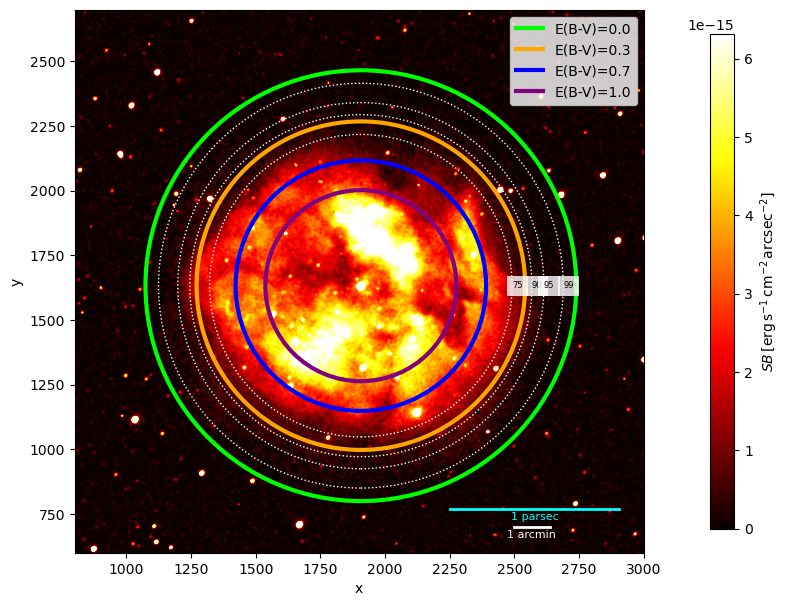

In [35]:
### === Find Stromgren radius === ###

parsec = 3.086e18               # cm
distance = 714 * parsec         # distance (714) (800 ± 80 pc is the distance of Cocoon nebula)

T = 1e4
n_H = 1e2                       # Hydrogen number density typical for HII region [cm^-3]

wavelength_Ha = 656.281e-7      # Ha line (cm)
alpha_B = 2.6e-13               # Case B recombination coefficient cm^3 s^-1
parsec = 3.086e18               # cm


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))

# smooth for aestethics
from scipy.ndimage import gaussian_filter
smoothed_image_Ha_gauss = gaussian_filter(image['Ha'], sigma=3)

im = ax.imshow(smoothed_image_Ha_gauss, clim=[0,np.quantile(image['Ha'], 0.99)], cmap=filter_cmap['Ha'] , origin='lower')
plt.colorbar(im, ax = ax, location='right', fraction=0.0375, pad=0.1, 
             label="$SB\\, [\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, arcsec^{-2}}]$")

from matplotlib.patches import Circle
from matplotlib.lines import Line2D

center_x, center_y = radec_to_xy(328.370134,47.266320) 
angular_size_pixel_TOBI = 0.44 # arcsec per pixel

handles = []
colors = ['lime','orange','blue','purple']

for i,EBmV in enumerate(np.linspace(0,1,4)):
    
    R_S = dusty_Stromgren_radius(EBmV)
    theta_stromgen_arcsec = R_S / distance * 206265
    circle = Circle((center_x, center_y), radius=theta_stromgen_arcsec / angular_size_pixel_TOBI, 
                    fill=False, linewidth=3, linestyle='-', color = colors[i])
    ax.add_patch(circle)
    
    handles.append(Line2D([0], [0], lw=3, linestyle='-', color = colors[i],
                        label=f"E(B-V)={EBmV:.1f}"))

R_75_pix = R_75 / angular_size_pixel_TOBI_arcmin
R_90_pix = R_90 / angular_size_pixel_TOBI_arcmin
R_95_pix = R_95 / angular_size_pixel_TOBI_arcmin
R_99_pix = R_99 / angular_size_pixel_TOBI_arcmin

for R, label in zip([R_75_pix, R_90_pix, R_95_pix, R_99_pix], ['75', '90', '95', '99']):
    circle = Circle((center_x, center_y), radius=R, fill=False, linewidth=1, 
                    linestyle=':', color='white')
    ax.add_patch(circle)
    
    # Add text annotation near the edge of each circle
    ax.text(center_x + R, center_y, label, color='black', fontsize=6,
            va='center', ha='left', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax.set_xlim(800,3000)
ax.set_ylim(600,2700)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(handles=handles, loc='upper right')

ax.text(900,2600,f"$d = $ {distance/parsec:.0f} pc")

ax.plot([2500, 2500 + 1/angular_size_pixel_TOBI_arcmin], [700,700], color='white', lw=2)
ax.text(2500 + 1/angular_size_pixel_TOBI_arcmin / 2, 700 - 10, "1 arcmin", color='white',
        ha='center', va='top', fontsize=8)

L = (1*parsec/distance) * 3437.75 / angular_size_pixel_TOBI_arcmin
ax.plot([2250, 2250 + L], [770,770], color='cyan', lw=2)
ax.text(2250 + L / 2, 770 - 10, "1 parsec", color='cyan',
        ha='center', va='top', fontsize=8)


plt.tight_layout()  
plt.show()

# Radial profile of the ionized fraction


In [111]:
# nebula physical parameters

T = 1e4                         # temperature [K]
n_H = 1e2                       # Hydrogen number density typical for HII region [cm^-3]
sigma_H = 6.3e-18               # photoionization cross section [cm^2]

alpha_B = 2e-13 # * T**(-3/4)    # hydrogen recombination rate for n>=2 [cm^3 s^-1] 

In [118]:
# Root-finding function: for given r, founds correspondent x solving equation f_root(r=param,x) = 0
# To compute tau a x(r) function must be already defined. This function will be updated recursively
r_in = 0.2 * parsec
def f_root(r, x, x_func):  
    if r > r_in:
        tau_r, _ = quad(lambda r_prime: ((1 - x_func(r_prime)) * n_H * sigma_H + csi * sigma_dust_H_eff * n_H), r_in, r, epsabs=1e-3, epsrel=1e-3)
    else:
        tau_r = 0
    
    return S / (4 * np.pi * r**2) * np.exp(-tau_r) * sigma_H * (1 - x) - x**2 * n_H * alpha_B


# Define the iterative solver
# Solve for the ionization fraction profile x(r) iteratively

from scipy.optimize import fsolve
def solve_ionization_profile(r_max, num_points=40, tol=1e-3, max_iter=100):   #sigma_dust

    r_array = np.linspace(0, r_max, num_points)
    x_array = np.ones_like(r_array)  # Initial guess: fully ionized (x = 1 everywhere)
    
    for iteration in range(max_iter):
        # Define x_func as an interpolator for the current x_array
        x_func = lambda r: np.interp(r, r_array, x_array)
        
        # Solve for x at each radius
        x_new = np.zeros_like(x_array)
        for i, r in enumerate(r_array):
            x_new[i] = fsolve(lambda x: f_root(r,x,x_func), x_array[i])[0]
    
        # Convergence ? 
        if np.max(np.abs(x_new - x_array)) < tol:
            break
        x_array = x_new
    else:
        print("Warning: Did not converge.")    
    return r_array, x_array




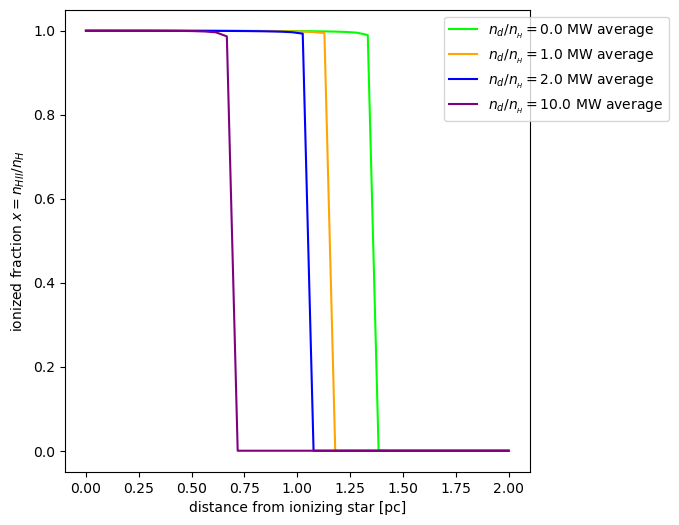

In [119]:
fig, ax = plt.subplots(figsize=(6,6))

# How much dust is present in the nebula compared to galactic average 
dust_H_fraction = [0,1,2,10]
colors = ['lime','orange','blue','purple']

r_max = 2 * parsec  # Maximum radius to consider (cm)
for csi,col in zip(dust_H_fraction,colors):

    # Solve for x(r)
    
    r_array, x_array = solve_ionization_profile(r_max)
    ax.plot(r_array/parsec,x_array,label=f"$n_d / n_{{_H}} = ${csi:.1f} MW average",c=col)

ax.set_xlabel("distance from ionizing star [pc]")
ax.set_ylabel("ionized fraction $x = n_{HII}/n_H$")

ax.legend(loc='upper left', bbox_to_anchor=(0.8, 1))


plt.show()